In [10]:
import numpy as np
from numpy.random import uniform
from math import cos, sin, pi

In [11]:
def generate1():  
    a = uniform(0, 1)  
    b = uniform(0, 1)  
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))

def generate2():  
    while True:  
        x = uniform(-1, 1)  
        y = uniform(-1, 1)  
        if x ** 2 + y ** 2 > 1:  
            continue  
        return (x, y)

In [13]:
data_1 = [generate1() for i in range(100)]

In [14]:
dt1 = {'x':[],
      'y':[]}
for point in data_1:
    dt1['x'].append(point[0])
    dt1['y'].append(point[1])

In [16]:
import matplotlib.pyplot as plt

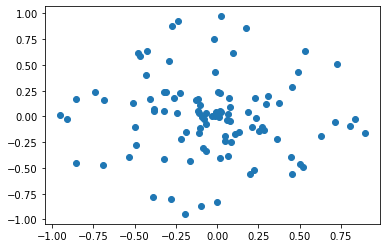

In [18]:
plt.scatter(dt1['x'], dt1['y'])

In [19]:
np.cov(dt1['x'], dt1['y'])

array([[ 0.146596  , -0.00693526],
       [-0.00693526,  0.14924458]])

In [20]:
np.linalg.det(np.cov(dt1['x'], dt1['y']))

0.021830560262269823

In [28]:
def get_dets(generator):
    dets = []
    for i in range(100):
        data = [generator() for i in range(500)]
        dt = {'x':[],
              'y':[]}
        for point in data:
            dt['x'].append(point[0])
            dt['y'].append(point[1])
        dets.append(np.linalg.det(np.cov(dt['x'], dt['y'])))
    return dets

In [29]:
dets1 = get_dets(generate1)
dets2 = get_dets(generate2)

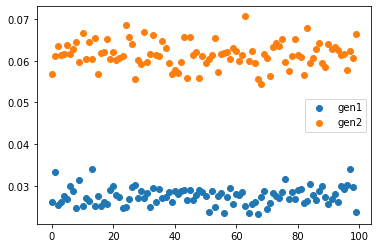

In [32]:
plt.scatter(np.arange(len(dets1)), dets1, label='gen1')
plt.scatter(np.arange(len(dets2)), dets2, label='gen2')
plt.legend();

In [34]:
a = max(dets1)
a

0.03407625625102866

In [35]:
b = min(dets2)
b

0.054445170239391515

In [37]:
treshold = (a+b)/2
treshold

0.04426071324521009

In [38]:
import numpy as np

dets = []

with open("input.txt") as f:
    for line in f:
        points = list(map(float, line.split()))
        Xs = points[::2]
        Ys = points[1::2]
        cov = np.cov(Xs, Ys)
        dets.append(np.linalg.det(cov))
        
treshold = 0.0442607

for i in dets:
    if i < treshold:
        print(1)
    else:
        print(2)

FileNotFoundError: [Errno 2] No such file or directory: 'input.txt'